# Dosages par méthodes physiques

Inspiré de ["Dosages par méthodes physiques"](https://labotp.org/TPTSPE/TSpe-TPC2-ConductiSpectro.pdf), données récolté à l'aide de [Beer's Law Lab](https://phet.colorado.edu/en/simulations/beers-law-lab).

## Objectif

Déterminer la concentration en masse inconnue d'une solution de permanganate de potassium à l'aide de deux méthodes différentes de dosage par étalonnage.

## Méthode 1 : Conductivité et Loi de Kohlrausch

Un conductimètre mesure la conductivité $\sigma$ d'une solution.La conductivité reflète l’aptitude d’une solution à conduire le courant électrique.
La loi de Kohlrausch indique que la conductivité $\sigma$ est proportionnelle à la concentration $c$ des ions en solution :
\begin{equation*}
    \sigma = k.c
\end{equation*}
Cette loi est valable pour des solutions diluées de concentrations en masse comprises entre 10 et 60 mg. L<sup>-1</sup>.

<img src="conductivity.png" alt="conductivity plot" width="200px">

## Méthode 2: Absorbance et loi de Beer-Lambert

Le spectrophotomètre mesure l’absorbance d’une solution pour une lumière monochromatique de longueur d’onde choisie.
La loi de Beer-Lambert indique que l’absorbance A est proportionnelle à la concentration de l’espèce colorée :
\begin{equation*}
    A = k.c
\end{equation*}

Cette loi est valable pour des solutions diluées de concentrations en
masse comprises entre 10 et 60 mg.L<sup>–1</sup>. 

<img src="absorbance.png" alt="absorbance plot" width="200px">

# Solution

## Importation des données

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")
print(data)

   Concentration  Conductivity  Absorbance
0            0.1         13.48         0.3
1            0.2         26.96         0.6
2            0.3         40.44         0.9
3            0.4         53.92         1.2
4            0.5         67.40         1.5
5            0.6         80.88         1.8
6            0.7         94.36         2.1
7            0.8        107.84         2.4


## Méthode 1 : 

### Figure

In [3]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Absorbance')

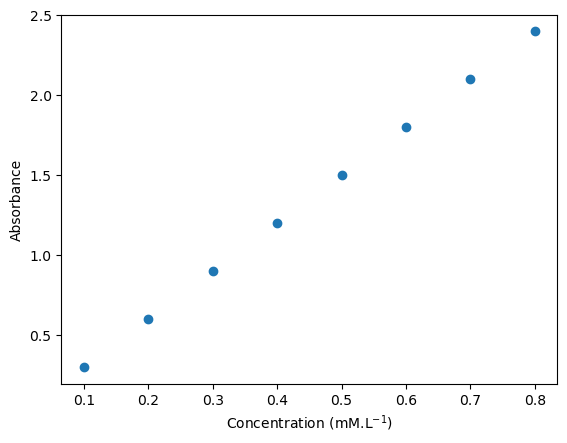

In [4]:
figure1, ax1 = plt.subplots()

ax1.scatter(data.Concentration, data.Absorbance, label="data")
ax1.set_xlabel("Concentration (mM.L$^{-1}$)")
ax1.set_ylabel("Absorbance")

### Calcul et ajout de la courbe de tendance

In [5]:
from scipy.stats import linregress

In [6]:
fit = linregress(data.Concentration, data.Absorbance)

print(f"La pente est : {fit.slope}")
print(f"L'ordonnée à l'origine est : {fit.intercept}")

La pente est : 3.0
L'ordonnée à l'origine est : 0.0


In [7]:
import numpy as np

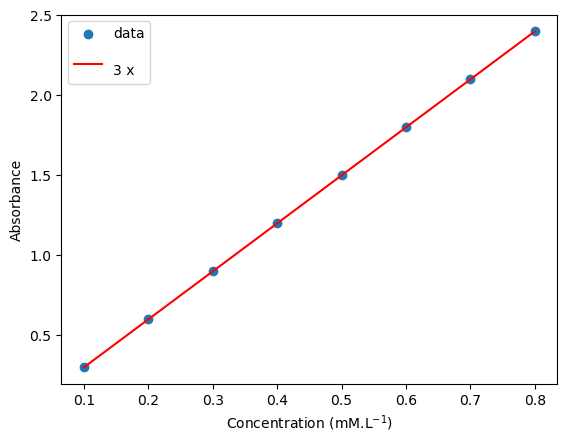

In [8]:
courbe_tendance = np.poly1d([fit.slope, fit.intercept])

ax1.plot(data.Concentration, courbe_tendance(data.Concentration), color="r", label=f"{courbe_tendance}")
ax1.legend()
figure1 # Permet de revisualiser la figure mise à jour


## Méthode 2 : 

### Figure

Text(0, 0.5, 'Conductivité')

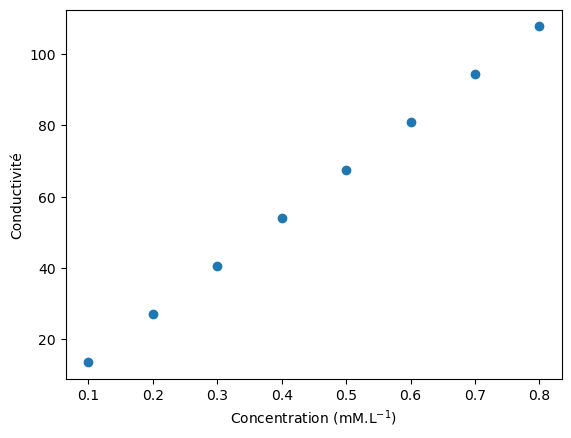

In [9]:
figure2, ax2 = plt.subplots()

ax2.scatter(data.Concentration, data.Conductivity, label="data")
ax2.set_xlabel("Concentration (mM.L$^{-1}$)")
ax2.set_ylabel("Conductivité")

### Calcul et ajout de la courbe de tendance

In [10]:
fit_conduct = linregress(data.Concentration, data.Conductivity)

print(f"La pente est : {fit_conduct.slope}")
print(f"L'ordonnée à l'origine est : {fit_conduct.intercept}")

La pente est : 134.79999999999998
L'ordonnée à l'origine est : 7.105427357601002e-15


r^2 = 0.9999999999999999


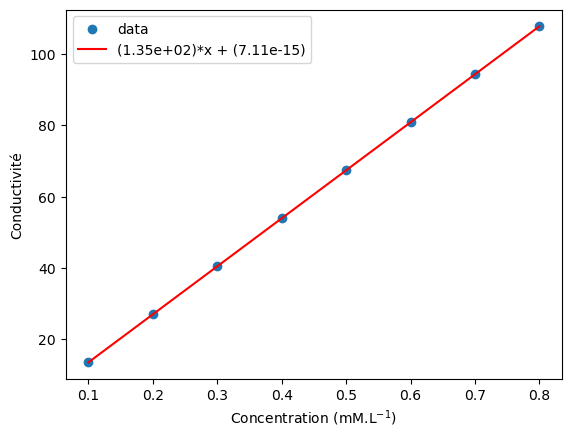

In [11]:
import sympy as sym
courbe_tendance_2 = np.poly1d([fit_conduct.slope, fit_conduct.intercept])

ax2.plot(data.Concentration, courbe_tendance_2(data.Concentration), color="r", label=f"({fit_conduct.slope:.3})*x + ({fit_conduct.intercept:.3})")
ax2.legend()
print(f"r^2 = {fit_conduct.rvalue}")
figure2 
